TO DO: 
ADD IMPRESSION LISTS FROM TEST SET TOO

In [15]:
import pandas as pd
import numpy as np
import datetime
import time 
import os
import gc
import re
import sys
from functools import partial
from gensim.models import Word2Vec
from utils import ignore_warnings, load_data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%time
# nrows = 10000
nrows = None
train = load_data('train', nrows=nrows)#, verbose=True)

CPU times: user 26.6 s, sys: 1.98 s, total: 28.6 s
Wall time: 27.5 s


In [3]:
# select the rows that is clickout
is_clickout = train.action_type == 'clickout item'
# # and it is not nan
# not_na = train.re.notna()
# and the impressions are not nans
imp_not_na = train.impressions.notna()
# only select the ones with 25 lens 
train['nimp'] = train.impressions.str.split('|').str.len()
twenty_five = train['nimp'] == 25

select_mask = is_clickout & imp_not_na & twenty_five

In [4]:
train = train[select_mask].reset_index(drop=True)

In [5]:
train.loc[train['current_filters'].isna(), 'current_filters'] = 'no_filter'
train.loc[train['reference'].isna(), 'reference'] = 'no_reference'

train['cfs'] = train['current_filters'].str.split('|')
train['imps'] = train['impressions'].str.split('|')

In [6]:
impressions = list(train.imps.values)
del train

In [7]:
# train model
model = Word2Vec(impressions, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
# print(words)
# access vector for one word
# print(model['sentence'])
# save model

Word2Vec(vocab=743076, size=100, alpha=0.025)


In [10]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=743076, size=100, alpha=0.025)


In [12]:
model['7818446']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-2.0144413e+00,  1.1568174e+00, -6.2109238e-01,  1.0633174e+00,
       -8.2602561e-01, -2.6226348e-01, -1.6958209e+00, -2.8288021e+00,
       -2.1744411e+00, -4.1091317e-01,  3.5852703e-01,  1.5474579e+00,
        2.4477021e-01,  7.5727874e-01, -7.7396756e-01, -2.0731273e-01,
        1.5846713e+00, -7.1653217e-01, -1.4701777e+00, -1.6516813e+00,
        5.3103161e-01, -6.5065104e-01,  1.2702786e+00, -5.2098846e-01,
       -5.5062592e-01, -9.6026373e-01, -5.3184509e-01, -5.3760993e-01,
        8.4507275e-01,  8.0885220e-01, -1.4180450e+00, -2.8646061e+00,
       -8.6287081e-01, -7.6530653e-01,  4.4016951e-01,  1.0021009e+00,
       -4.9640428e-02,  7.3594379e-01, -2.8694788e-01,  2.1631451e+00,
        1.7105944e-01, -9.0765190e-01,  3.2499340e-01, -1.1596663e-01,
        1.9619710e+00,  3.5924017e-01,  1.2044883e+00,  2.6775539e-01,
        4.1676474e-01,  5.8991337e-01, -8.8671178e-01,  2.2623544e+00,
        1.1244112e+00,  1.3567697e+00, -8.0893803e-01,  1.6259142e+00,
      

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


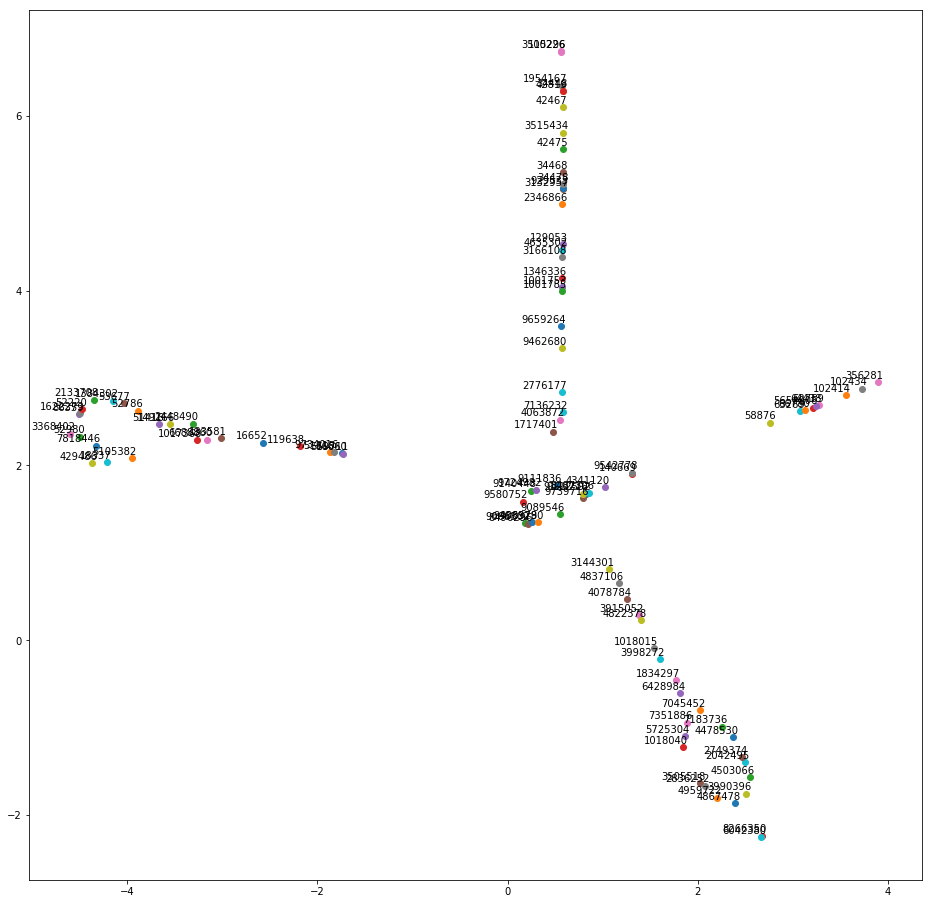

In [17]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    vocabs = list(model.wv.vocab)
    for word in vocabs[:100]:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model)

In [18]:
# impressions

In [9]:
# from gensim.models import Word2Vec
# # define training data
# sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
#              ['this', 'is', 'the', 'second', 'sentence'],
#              ['yet', 'another', 'sentence'],
#              ['one', 'more', 'sentence'],
#              ['and', 'the', 'final', 'sentence']]
# # train model
# model = Word2Vec(sentences, min_count=1)
# # summarize the loaded model
# print(model)
# # summarize vocabulary
# words = list(model.wv.vocab)
# print(words)
# # access vector for one word
# print(model['sentence'])
# # save model
# # model.save('model.bin')
# # load model
# # new_model = Word2Vec.load('model.bin')
# # print(new_model)